**Installation of required Libraries** 

@https://scikit-learn.org/stable/, 

https://hyperopt.github.io/hyperopt/

Mostly:https://huggingface.co/blog/sentiment-analysis-twitter

In [3]:
#Installing Required packages
!pip install tweet-preprocessor  # A library to preprocess tweets
!pip install wordcloud # A library to visualize word frequencies
!pip install transformers     # A library to fine-tune pre-trained models
!pip install torch             # A library for deep learning
!pip install imblearn # A library for dealing with imbalanced datasets
!pip install scikit-plot      # A library to plot machine learning evaluation metrics
!pip install hyperopt                  # A library for hyperparameter optimization


'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


**Importing Libraries**     
https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e

In [4]:
#Importing Libraries
import pandas as pd
# library for data manipulation and analysis
import re # regular expressions for string manipulation
import preprocessor as p # preprocessor library for tweet preprocessing
import nltk # Natural Language Toolkit for text processing
from nltk import word_tokenize, FreqDist # for tokenizing and frequency distribution
from nltk.corpus import stopwords # for stopwords
from nltk.stem import WordNetLemmatizer # for lemmatization
from nltk.tokenize import TweetTokenizer  # for tokenizing tweets
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, log_loss,f1_score
from wordcloud import WordCloud # for word cloud visualization
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for visualization
nltk.download('stopwords') # download stopwords corpus
nltk.download('wordnet') # download wordnet corpus
nltk.download('omw-1.4') # download Open Multilingual WordNet version 1.4


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**Reading data into Dataframe**
statology.org/drop-unnamed-column-pandas/

In [5]:
tweets_df = pd.read_csv('Final_tweets_extracted.csv') #Reading the CSV file containing tweets data into a pandas dataframe
tweets_df= tweets_df.drop('Unnamed: 0', axis=1) #Dropping the 'Unnamed: 0' column as it is not required
tweets_df #Printing the dataframe to check if the above changes were made successfully

,TweetAt,OriginalTweet
0,2021-12-30 23:59:59,The COVID-19 vaccine is available to children ...
1,2021-12-30 23:59:59,@Lonnie30johnson So sorry to@hear u have Covid 😞
2,2021-12-30 23:59:59,"@MelanieMH @CP24 Or, you could view it this wa..."
3,2021-12-30 23:59:59,"@haileybanack @TedJoy71 Not vaxxed, got covid,..."
4,2021-12-30 23:59:58,@CDMulgrave @AmazonChronicle @iv_technicals @z...
...,...,...
19995,2022-12-30 21:36:43,New COVID-19 measures have been announced for ...
19996,2022-12-30 21:36:42,@maybediggity @WSR36565608 @CTVVancouver Lets ...
19997,2022-12-30 21:36:42,"@ProfGThurston Got covid 3 times, first was he..."
19998,2022-12-30 21:36:42,I caught Covid at a festival. I was looking fo...


## Data preprocessing

**Data Cleaning**


*   Removing punctuations,lowercase,whitespaces,stopwards
*   Tokenization
*   lemmetization
https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0

In [6]:
def cleanText(documents):
    NOT_IMPORTANT = ['nan', 'of', 'in', 'would', 'get', 'them', 'i', 'you']
    s = re.sub(r'[^a-zA-Z0-9\s]', '', documents) # remove punctuation
    s = re.sub(r'@\w+\s*', '', s)
    s = re.sub('\s+',' ', s) #removing extra spaces
    s = str(s).lower() #lowercase the text
    # Replace 'covid19' or 'covid' with an empty string
    s = re.sub(r'covid19|covid|pm|amp|https|tco|coronavirus', '', s)
    
    
    tokens = [token for token in s.split(" ") if token != ""] #making list of words 
        
    tokens = [word for word in tokens if word not in stopwords.words('english')] # removing stopwards         
    tokenss = [] #list to store words after removing unimportant words
    for word in tokens: 
        if word not in NOT_IMPORTANT and word not in tokenss: #check to remove unneccassary words
            tokenss.append(word)
        
    review = ' '.join(tokenss) # join the cleaned list back to string
 

    #Initializing lemmetizer and tweetTokenizer instance
    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer = TweetTokenizer()
    review = lemmatizer.lemmatize(review) # lemmanize tweets
    review = w_tokenizer.tokenize(review) # tokenize tweets
    return(review) 

In [7]:
tweets_df['cleaned_text'] = tweets_df['OriginalTweet'].apply(cleanText)
# We have got list of words in each row in cleaned_text column so converting list into string by using join() method
tweets_df['Cleaned_string'] = [' '.join(map(str, l)) for l in tweets_df['cleaned_text']]
tweets_df

,TweetAt,OriginalTweet,cleaned_text,Cleaned_string
0,2021-12-30 23:59:59,The COVID-19 vaccine is available to children ...,"[vaccine, available, children, ages, 511, ulgs...",vaccine available children ages 511 ulgs equit...
1,2021-12-30 23:59:59,@Lonnie30johnson So sorry to@hear u have Covid 😞,"[lonnie, 30johnson, sorry, tohear, u]",lonnie 30johnson sorry tohear u
2,2021-12-30 23:59:59,"@MelanieMH @CP24 Or, you could view it this wa...","[melaniemh, cp24, could, view, way, bosses, co...",melaniemh cp24 could view way bosses companies...
3,2021-12-30 23:59:59,"@haileybanack @TedJoy71 Not vaxxed, got covid,...","[haileybanack, tedjoy, 71, vaxxed, got, gave, ...",haileybanack tedjoy 71 vaxxed got gave dad isn...
4,2021-12-30 23:59:58,@CDMulgrave @AmazonChronicle @iv_technicals @z...,"[cdmulgrave, amazonchronicle, ivtechnicals, ze...",cdmulgrave amazonchronicle ivtechnicals zerohe...
...,...,...,...,...
19995,2022-12-30 21:36:43,New COVID-19 measures have been announced for ...,"[new, measures, announced, travellers, enterin...",new measures announced travellers entering ita...
19996,2022-12-30 21:36:42,@maybediggity @WSR36565608 @CTVVancouver Lets ...,"[maybediggity, wsr, 3656560, 8, ctvvancouver, ...",maybediggity wsr 3656560 8 ctvvancouver lets s...
19997,2022-12-30 21:36:42,"@ProfGThurston Got covid 3 times, first was he...","[profgthurston, got, 3, times, first, heavy, 2...",profgthurston got 3 times first heavy 2nd mild...
19998,2022-12-30 21:36:42,I caught Covid at a festival. I was looking fo...,"[caught, festival, looking, forward, day, didn...",caught festival looking forward day didnt want...


**Checking tweet length**
@ https://towardsdatascience.com/cleaning-preprocessing-text-data-by-building-nlp-pipeline-853148add68a

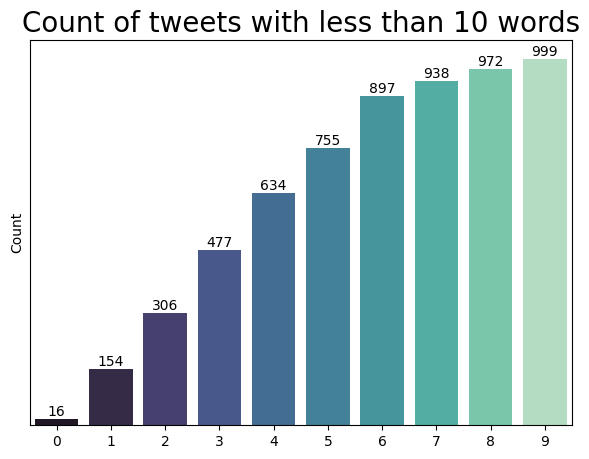

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#Applying len() function to each cleaned tweet to get the length of each tweet
text_len = tweets_df.Cleaned_string.apply(lambda x: len(x.split()))
tweets_df['text_len'] = text_len #Creating a new column in the dataframe to store the length of each tweet
# Plotting a countplot of the number of tweets with less than 10 words
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=tweets_df[tweets_df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20) #Adding labels to the bars
plt.yticks([])
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('Count')
plt.xlabel('')
plt.show() #Displaying the plot


In [9]:
#Filter the tweets based on their length using between() method and keep only those tweets whose length is between 9 and 99 characters.
tweets_df = tweets_df[tweets_df['text_len'].between(9, 99)].sort_values(by=['text_len'], ascending=False)
# Sort the filtered dataframe in descending order
tweets_df

,TweetAt,OriginalTweet,cleaned_text,Cleaned_string,text_len
17365,2022-12-30 22:14:31,@Service_Proof @fluffyredhead @mpc_xetts @Mich...,"[serviceproof, fluffyredhead, mpcxetts, michae...",serviceproof fluffyredhead mpcxetts michael 94...,98
10534,2022-12-30 23:51:51,@MaryMarykf61 @Melissamcadam10 @TackettWendi @...,"[marymarykf, 61, melissamcadam, 10, tackettwen...",marymarykf 61 melissamcadam 10 tackettwendi ki...,97
6582,2021-12-30 23:35:42,@Canadianworker2 @BluesElmwood @BluePittie @ke...,"[canadianworker, 2, blueselmwood, bluepittie, ...",canadianworker 2 blueselmwood bluepittie keith...,96
15775,2022-12-30 22:36:46,@TakethatCt @delboy00789 @Service_Proof @mpc_x...,"[takethatct, delboy, 00789, serviceproof, mpcx...",takethatct delboy 00789 serviceproof mpcxetts ...,96
15222,2022-12-30 22:43:48,@wobski421 @aclem81 @ShaneJa16905901 @Gazza41 ...,"[wobski, 421, aclem, 81, shaneja, 16905901, ga...",wobski 421 aclem 81 shaneja 16905901 gazza 41 ...,93
...,...,...,...,...,...
947,2021-12-30 23:56:24,Dr. Makary on COVID surge: 'Omicron infection ...,"[dr, makary, surge, omicron, infection, may, n...",dr makary surge omicron infection may natures ...,9
948,2021-12-30 23:56:24,@WisdomBoxing1 @JJudahIsaac I didn't know covi...,"[wisdomboxing, 1, jjudahisaac, didnt, know, te...",wisdomboxing 1 jjudahisaac didnt know testing ...,9
16887,2022-12-30 22:21:07,@ProfGThurston What a horrible sentiment. I'm ...,"[profgthurston, horrible, sentiment, im, third...",profgthurston horrible sentiment im third free...,9
16864,2022-12-30 22:21:27,County officials urge residents to test for CO...,"[county, officials, urge, residents, test, ret...",county officials urge residents test returning...,9


**Getting Insight into the Tweets** 
https://www.geeksforgeeks.org/python-pandas-series-astype-to-convert-data-type-of-series/

In [10]:
tweets_df['Cleaned_string']=tweets_df['Cleaned_string'].astype(str)

https://www.datacamp.com/tutorial/wordcloud-python

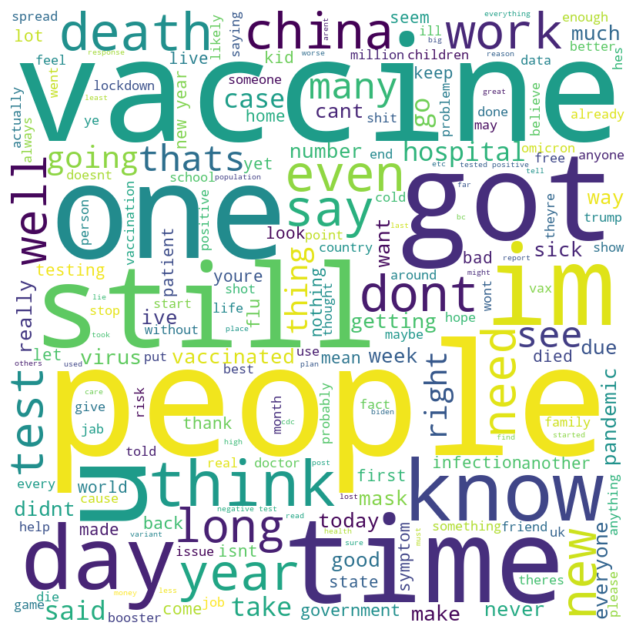

In [11]:
# combine the text from the 'Text' column into a single string

combined_document = ' '.join(tweets_df['Cleaned_string'])
# create a wordcloud object
wc = WordCloud(width=800, height=800, background_color='white', max_words=200)

# generate the wordcloud
wc.generate(combined_document)

# plot the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show() # dsiplay plot 


**Frequent Term Analysis** https://towardsdatascience.com/beyond-the-cloud-4-visualizations-to-use-instead-of-word-cloud-960dd516f215

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


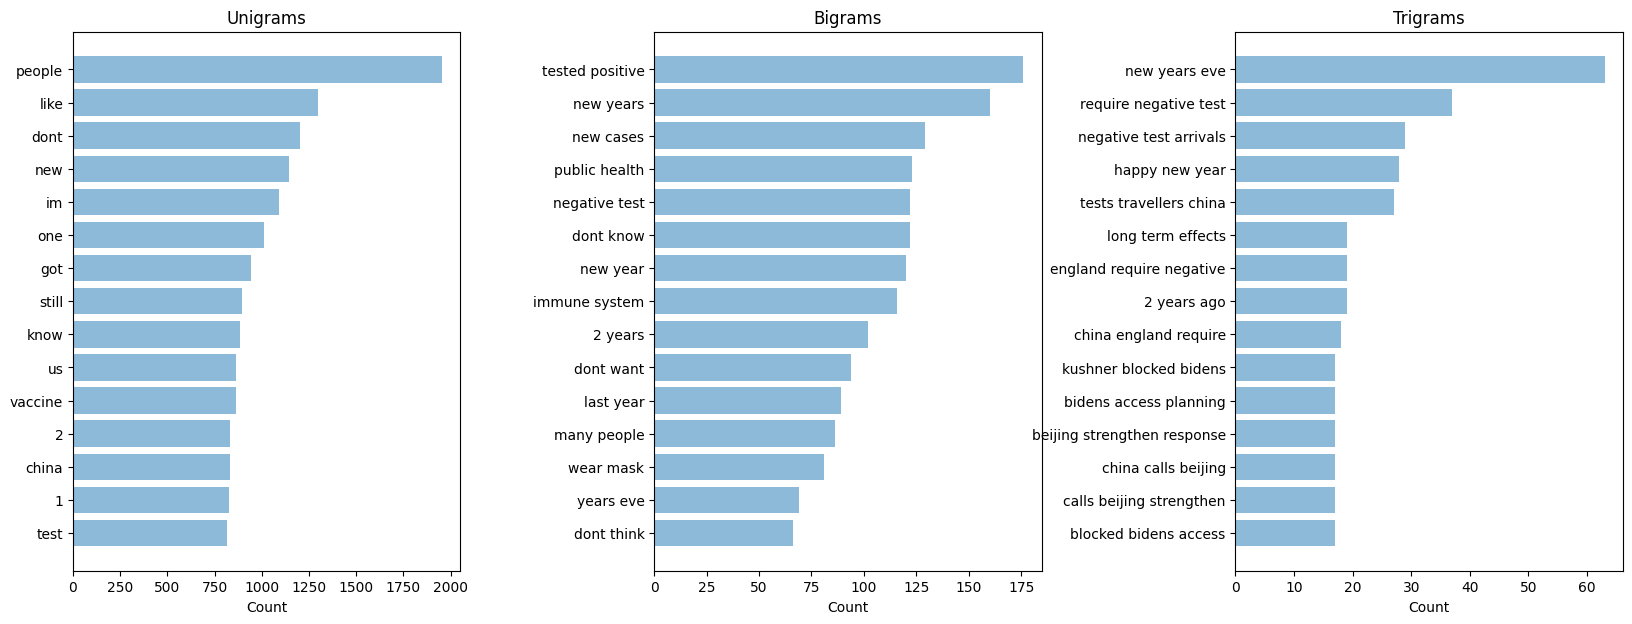

In [12]:
#Importing the warnings module and disabling all the warnings that might be displayed during execution.
import warnings
warnings.filterwarnings("ignore")
from nltk.util import ngrams #Importing required libraries
from collections import Counter
import nltk
import numpy as np
nltk.download('stopwords')
# Creating a list of words that are not important for the analysis.
NOT_IMPORTANT = ['nan', 'of', 'in', 'would', 'get', 'them', 'i', 'you']
#Defining a function to clean the documents 
def cleanReviews(documents):
    cleanedReviews = []
    for document in documents:
        document = str(document)
        s = re.sub(r'[^a-zA-Z0-9\s]', '', document)
        s = re.sub('\s+',' ', s)
        s = str(s).lower()
        tokens = [token for token in s.split(" ") if token != ""]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        
        tokenss = []
        for word in tokens:
            if word not in NOT_IMPORTANT and word not in tokenss:
                tokenss.append(word)
        
        review = ' '.join(tokenss)
        cleanedReviews.append(review)
    return(cleanedReviews)
# Defining a function to generate n-grams
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()
    
def textTrends(documents):
    cleanedReviews = cleanReviews(documents)
    plotNgrams(cleanedReviews)
textTrends(tweets_df['Cleaned_string'])

**Fine tuning model on External Dataset**

### Fine Tuning Roberta Model and Saving Roberta Model-- 
It will check if it finds loaded model in disc it will pass else will Fine tune model.

https://huggingface.co/transformers/v3.4.0/custom_datasets.html

In [13]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
# try to load the pre-trained model
try:
    roberta='sentiment_model'
    # if the model is not found, prepare the data and fine-tune the model

except: 
    df=pd.read_csv('Training_dataset.csv')     # read the dataset
    df['cleaned_text'] = df['OriginalTweet'].apply(cleanText)
    # We have got list of words in each row in cleaned_text column so converting list into string by using join() method
    df['Cleaned_string'] = [' '.join(map(str, l)) for l in df['cleaned_text']]
    df
    #extract only required columns from the DataFrame and reset index
    data = df[['Cleaned_string', 'Sentiment']]
    data = data.reset_index(drop=True)


    # load pre-trained RoBERTa model and tokenizer
    roberta = "cardiffnlp/twitter-roberta-base-sentiment"
    tokenizer = RobertaTokenizer.from_pretrained(roberta)
    model = RobertaForSequenceClassification.from_pretrained(roberta, num_labels=3)

    # define function to preprocess data for fine-tuning
    def preprocess_data(data):
        # encode labels as integers
        label_map = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
        labels = [label_map[label] for label in data['Sentiment']]
        # tokenize input text
        encoded_inputs = tokenizer(data['Cleaned_string'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')
        return {'input_ids': encoded_inputs['input_ids'], 'attention_mask': encoded_inputs['attention_mask'], 'labels': torch.tensor(labels)}

    # Split dataframe into training and testing datasets
    train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

    # preprocess training and validation data
    train_dataset = preprocess_data(train_data)
    val_dataset = preprocess_data(val_data)

    # define training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=3,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy='steps',
        eval_steps=100,
        load_best_model_at_end=True
    )

    # define trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer
    )

    #create a DataLoader for training data
    train_loader = DataLoader(train_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True)

    #train the model
    for epoch in range(training_args.num_train_epochs):
      try:
          for step, batch in enumerate(train_loader):
            inputs = {
                  "input_ids": batch["input_ids"],
                  "attention_mask": batch["attention_mask"],
                  "labels": batch["labels"],
              }
            outputs = model(**inputs)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            scheduler.step()
            model.zero_grad()

            if step % 10 == 0:
                print(f"Epoch: {epoch}, Step: {step}, Loss: {loss.item()}")   
      except:
          pass


    # save fine-tuned model
    trainer.save_model('sentiment_model')

## Generating Sentiment scores using  Roberta Model for unlabelled Tweets

https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

In [14]:
# Import required libraries
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch.nn as nn

# Define the pre-trained model and tokenizer
#roberta = "cardiffnlp/twitter-roberta-base-sentiment"
roberta='sentiment_model'
tokenizer = RobertaTokenizer.from_pretrained(roberta)
model = RobertaForSequenceClassification.from_pretrained(roberta, num_labels=3,ignore_mismatched_sizes=True)

# Extract the cleaned string from the tweets dataframe and convert to list
documents=tweets_df['Cleaned_string'].to_numpy().tolist()

# Initialize a list to store sentiment scores
sentiment_scores=[]

# Loop through each document and calculate sentiment score using RoBERTa
for document in documents:
  # Tokenize each document using the RoBERTa tokenizer
  tokens = tokenizer.encode(document, return_tensors='pt')
  
  # Get the model output for the tokenized document
  output = model(tokens)

  # Extract the scores from the output and convert to numpy array
  scores = output[0][0].detach().numpy()
  
  # Calculate the sentiment score from the scores array
  sentiment_score = scores.argmax().item() - 1
  
  # Append the sentiment score to the list
  sentiment_scores.append(sentiment_score)
  
# Initialize an empty list
labels=[]
#Add labels based on the sentiment score
for sentiment_score in sentiment_scores:
  if sentiment_score > 0: #if score greater than 0 assign it positive
      labels.append("Positive")
  elif sentiment_score < 0:
      labels.append("Negative") #if score less than 0 assign it negative
  else:
    labels.append("Neutral")
    

#Add the sentiment scores  and labels to the tweets_df DataFrame
tweets_df['Roberta_score']=sentiment_scores
tweets_df['Sentiment']=labels


In [15]:
tweets_df = tweets_df[tweets_df['Sentiment'].isin(['Positive','Negative'])]
tweets_df

,TweetAt,OriginalTweet,cleaned_text,Cleaned_string,text_len,Roberta_score,Sentiment
11487,2022-12-30 23:38:17,@WendyOrent @Melissamcadam10 @KikiAdine @waste...,"[wendyorent, melissamcadam, 10, kikiadine, was...",wendyorent melissamcadam 10 kikiadine wastedti...,93,-1,Negative
17813,2022-12-30 22:08:28,@TonyBaduy @JKelleyK @ZeetubesII @simon_says99...,"[tonybaduy, jkelleyk, zeetubesii, simonsays, 9...",tonybaduy jkelleyk zeetubesii simonsays 99 lou...,91,-1,Negative
17026,2022-12-30 22:19:08,@Michael94173566 @Tdillon06 @BlaylockMooky @mp...,"[michael, 9417356, 6, tdillon, 06, blaylockmoo...",michael 9417356 6 tdillon 06 blaylockmooky mpc...,89,-1,Negative
16188,2022-12-30 22:31:22,@hoothathuh @carlsmythe @zxbxngxz @ShaneAKAPro...,"[hoothathuh, carlsmythe, zxbxngxz, shaneakapro...",hoothathuh carlsmythe zxbxngxz shaneakaprop ry...,84,-1,Negative
18264,2022-12-30 22:01:55,@pawley_robert @AspAlaAsnAsnTyr @mcfunny @Maur...,"[pawleyrobert, aspalaasnasntyr, mcfunny, maure...",pawleyrobert aspalaasnasntyr mcfunny maureenst...,82,1,Positive
...,...,...,...,...,...,...,...
7920,2021-12-30 23:30:54,@94ALWAY5XY0U He can’t have fucking covid it c...,"[94alway5xy0u, cant, fucking, couple, kill, bi...",94alway5xy0u cant fucking couple kill bim toma...,9,-1,Negative
7839,2021-12-30 23:31:09,"Russia witnesses 71,000 Covid deaths in Novemb...","[russia, witnesses, 71000, deaths, november, s...",russia witnesses 71000 deaths november state a...,9,-1,Negative
7840,2021-12-30 23:31:09,"@kylegriffin1 I’m not sorry, but I’m to the po...","[kylegriffin, 1, im, sorry, point, read, someo...",kylegriffin 1 im sorry point read someone pass...,9,-1,Negative
7871,2021-12-30 23:31:04,@thefruitycowboy @29oettinger dbbdbdjdjdjxbdhf...,"[thefruitycowboy, 29oettinger, dbbdbdjdjdjxbdh...",thefruitycowboy 29oettinger dbbdbdjdjdjxbdhf e...,9,-1,Negative


### Printing Negative tweets 

https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [16]:
import random
import re
from tabulate import tabulate
# Filter tweets with negative sentiment

neg = tweets_df[tweets_df['Sentiment'] == 'Negative']
negative_tweets = neg['OriginalTweet'].to_numpy().tolist()

tweets_table = []
# Randomly select 5 negative tweets and append them to the tweets_table list
for i in range(0, 5):
    s=random.choice(negative_tweets)
    tweet = re.sub(r'@\w+\s*', '', s) # Remove usernames from tweet
    tweets_table.append([i+1, tweet[:70] + '...'])

headers=["Tweet #", "Tweet Text"]
col_widths=[8, 75]
# Print the tweets_table using the tabulate library
print(tabulate(tweets_table, headers=headers, tablefmt='presto'))


   Tweet # | Tweet Text
-----------+---------------------------------------------------------------------------
         1 | You’re right look how fast the lie of Covid spread. And the truth is r...
         2 | So annoying that if your on benefits and don’t work you can claim the ...
         3 | Any social media company that wants to be taken seriously needs to sto...
         4 | If you're appalled by what the former administration did or didn't do ...
         5 | Some people get really really sick for a very long time with covid.  i...


### Positive Tweets

In [17]:
import random # import required libraries
import re
from tabulate import tabulate
# extract positive tweets from the dataframe
pos=tweets_df[tweets_df['Sentiment']=='Positive']
Positive_tweets=pos['OriginalTweet'].to_numpy().tolist()
# create a table to display randomly selected positive tweets
tweets_table = []

for i in range(0, 5):
    s=random.choice(Positive_tweets)
    tweet = re.sub(r'@\w+\s*', '', s) # Remove usernames from tweet
    tweets_table.append([i+1, tweet[:70] + '...'])
# set table headers and column widths
headers=["Tweet #", "Tweet Text"]
col_widths=[8, 75]
# display the table
print(tabulate(tweets_table, headers=headers, tablefmt='presto'))


   Tweet # | Tweet Text
-----------+----------------------------------------------------------------------------
         1 | I like Hamonic, always have. A top 4 Dman for me. Has been battling so...
         2 | So - you want to confirm that scientists are right that  after two yea...
         3 | This year yes. Got to enjoy Christmas and New Years 2021 in bed with C...
         4 | Over Thanksgiving, it is important that If you test positive for COVID...
         5 | Welcome to the Covid club!! We tested positive also! Happy New Year! 🥂...


In [18]:
counts = tweets_df['Sentiment'].value_counts()
#calculates the number of tweets
positive_count = counts['Positive'] 
#checks if the count of negative tweets is greater
negative_count = counts['Negative']
#calculates the difference
if negative_count>positive_count:
    n=negative_count-positive_count

### Barplot for Sentiment Labels

https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

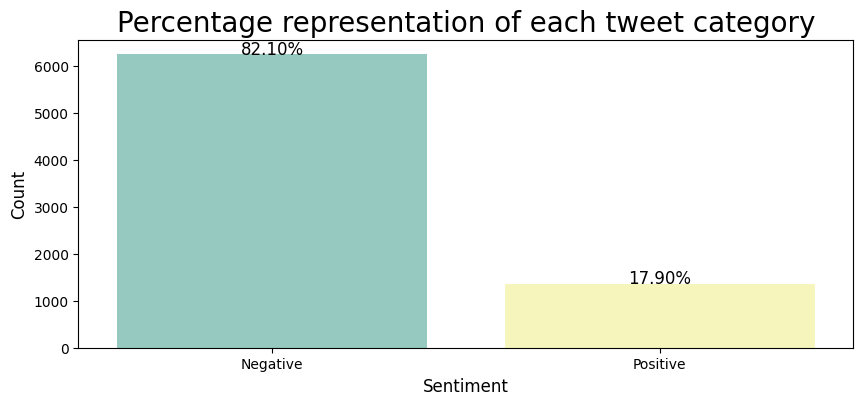

In [19]:
plt.figure(figsize=(10, 4)) # Set figure size
# Create countplot using seaborn
ax = sns.countplot(x='Sentiment', data=tweets_df, palette='Set3')
plt.title('Percentage representation of each tweet category', fontsize=20)
plt.ylabel('Count', fontsize=12) # Set title and labels

plt.xlabel('Sentiment', fontsize=12)
# Add percentage values above each bar

total = float(len(tweets_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center",
            fontsize=12) 
    # Show plot

plt.show()

#### Balancing Dataset

In [20]:
#Appending data for year 2020
df=pd.read_csv('Training_dataset.csv')
df_positive=df[df['Sentiment']=='Positive']

In [21]:

#df_positive=df_positive[:n]
#Randomly select n rows
df_positive = df_positive.sample(n=n, replace=False) # randomly select n rows

df_positive['cleaned_text'] = df_positive['OriginalTweet'].apply(cleanText)
# We have got list of words in each row in cleaned_text column so converting list into string by using join() method
df_positive['Cleaned_string'] = [' '.join(map(str, l)) for l in df_positive['cleaned_text']]
df_positive=df_positive[['OriginalTweet','Cleaned_string','Sentiment']]

final = pd.concat([tweets_df,df_positive])

final['Sentiment'].value_counts()

Negative    6250
Positive    6250
Name: Sentiment, dtype: int64

### WordCloud of Tweets

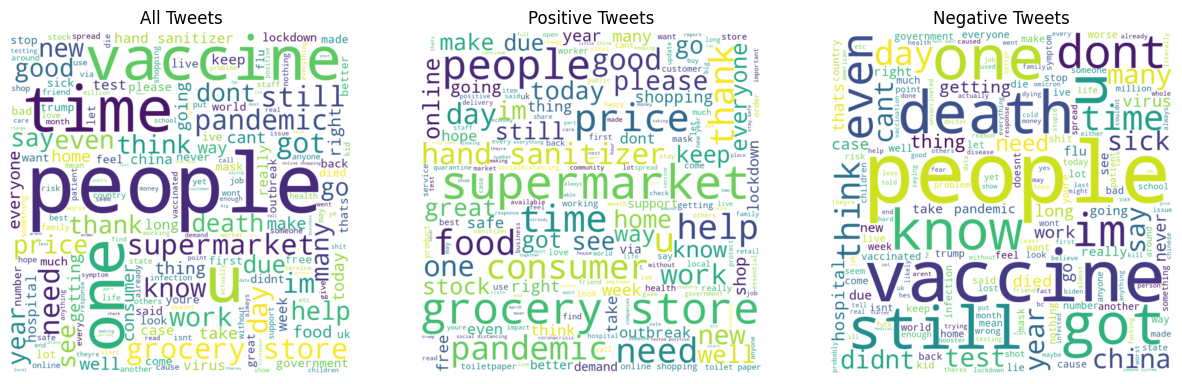

In [22]:
from wordcloud import WordCloud

# create a string of all cleaned tweets
all_tweets = ' '.join(final['Cleaned_string'])

# create a string of positive tweets only
positive_tweets = ' '.join(final[final['Sentiment']=='Positive']['Cleaned_string'])

# create a string of negative tweets only
negative_tweets = ' '.join(final[final['Sentiment']=='Negative']['Cleaned_string'])

# create a wordcloud object for all tweets
all_wc = WordCloud(width=800, height=800, background_color='white', max_words=200).generate(all_tweets)

# create a wordcloud object for positive tweets
pos_wc = WordCloud(width=800, height=800, background_color='white', max_words=200).generate(positive_tweets)

# create a wordcloud object for negative tweets
neg_wc = WordCloud(width=800, height=800, background_color='white', max_words=200).generate(negative_tweets)

# plot the wordclouds
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].imshow(all_wc, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('All Tweets')

axs[1].imshow(pos_wc, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Positive Tweets')

axs[2].imshow(neg_wc, interpolation='bilinear')
axs[2].axis('off')
axs[2].set_title('Negative Tweets')

plt.show()


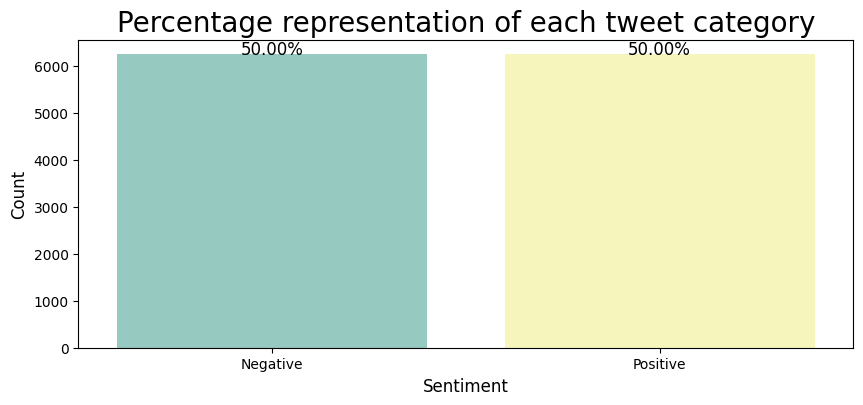

In [23]:
plt.figure(figsize=(10, 4)) #r plot using the seaborn library 
ax = sns.countplot(x='Sentiment', data=final, palette='Set3')
#displays the count of tweets 
plt.title('Percentage representation of each tweet category', fontsize=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
# The bar plot is colored 
total = float(len(final))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center",
            fontsize=12) 
    #  adds text labels to each bar displaying the percentage
plt.show()


## Frequent Term Analysis

### All Tweets

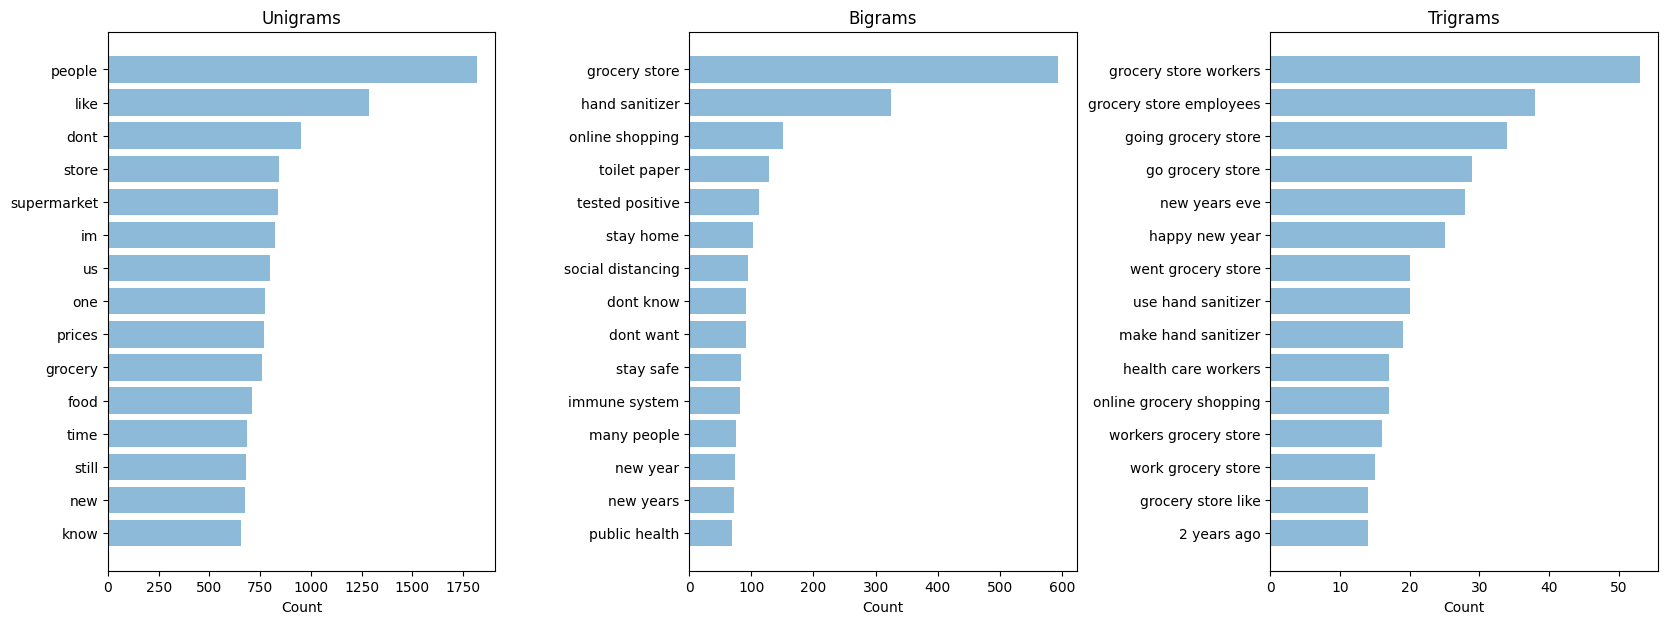

In [24]:
textTrends(final['Cleaned_string'])

### Negative Tweets

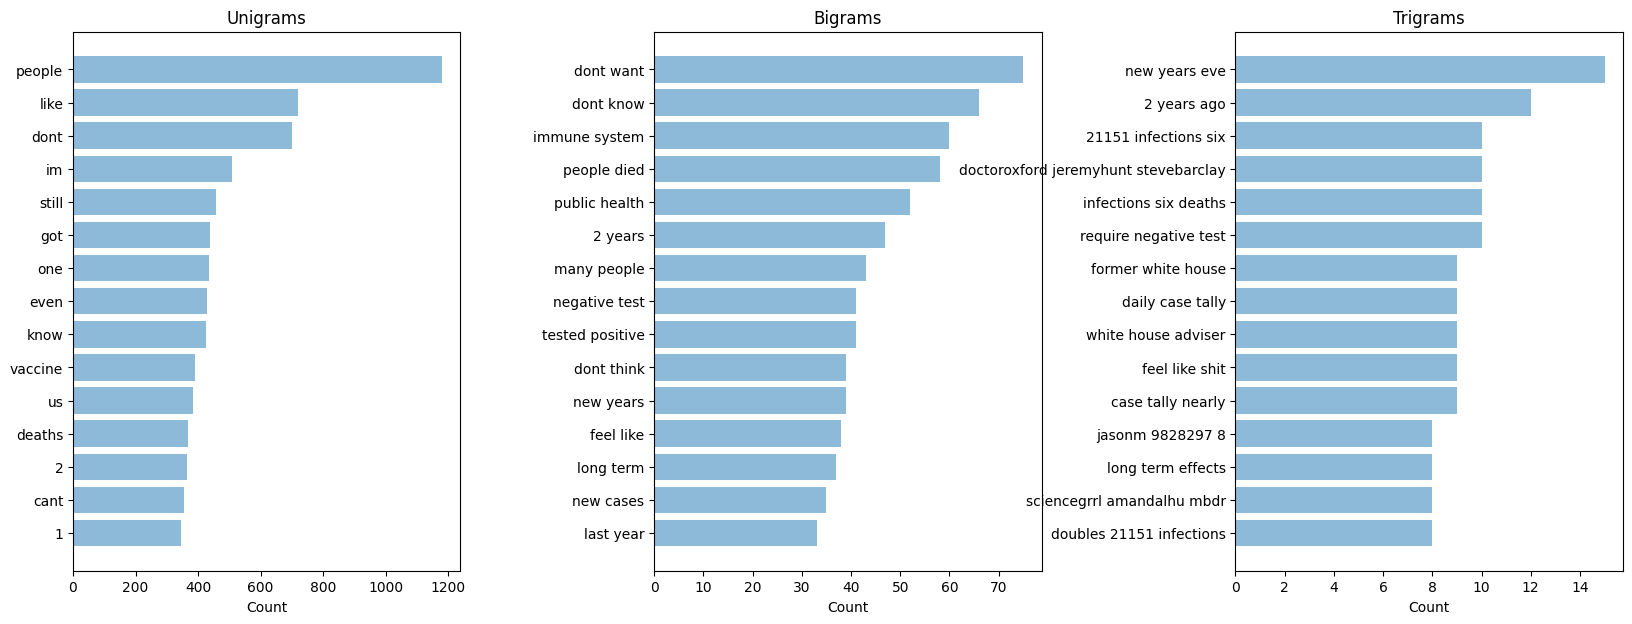

In [25]:
neg=final[final['Sentiment']=='Negative']
textTrends(neg['Cleaned_string'])

### Positive Tweets

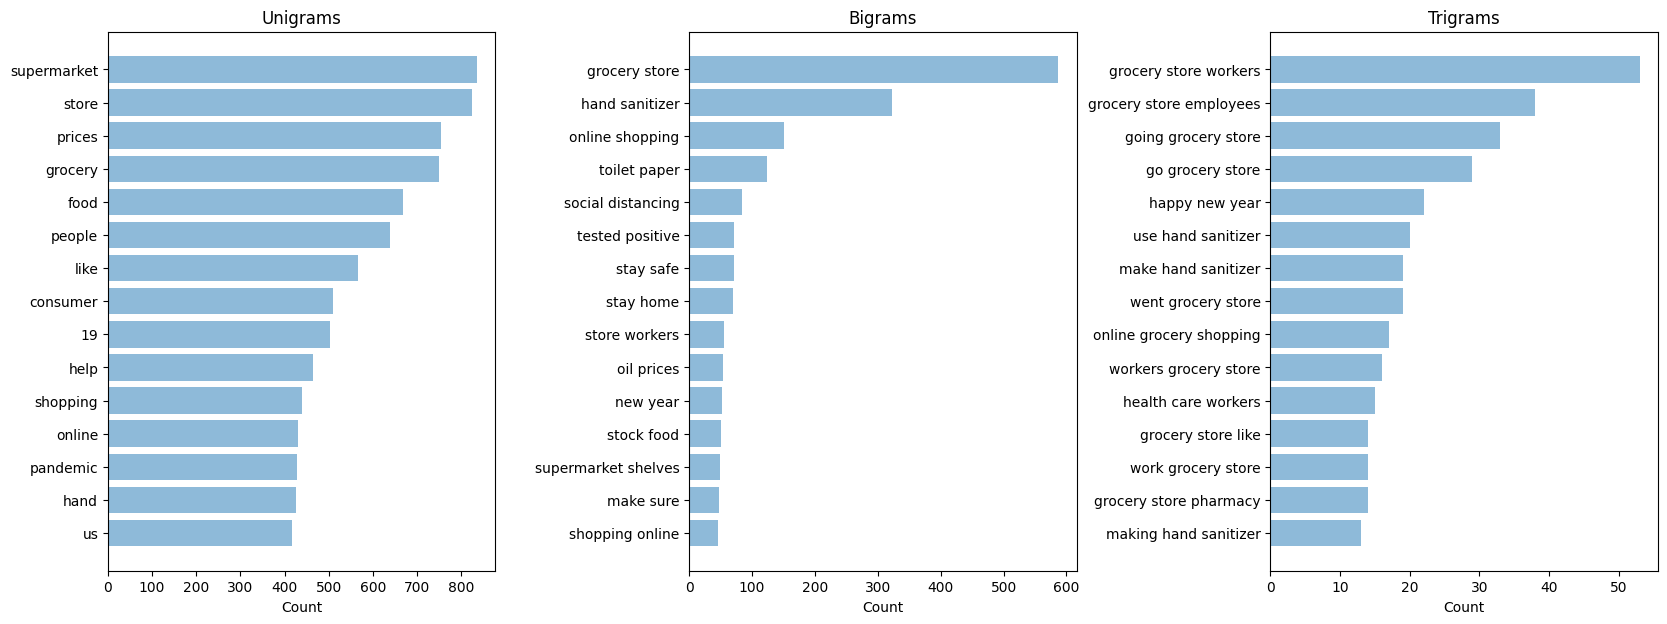

In [26]:
pos=final[final['Sentiment']=='Positive']
textTrends(pos['Cleaned_string'])

### Functions for Evaluation of Models

In [27]:
# Function to compute the detailed confusion matrix
def model_eval(matrix,model_name):
    tn=matrix[0][0]
    #tn = matrix.iloc[0,0]
    tp=matrix[1][1]
    #tp = matrix.iloc[1,1]
    fn=matrix[1][0]
    #fn = matrix.iloc[1,0]
    fp=matrix[0][1]
    #fp = matrix.iloc[0,1]         # positives, total actual negatives,
    tap = fn+tp
    tan = tn+fp    #confusion matrix 
    tpn = tn+fn
    tpp = fp+tp               #ccuracy, error rate, sensitivity
    precision = tp/tpp
    recall = tp/tap
    total = tn+tp+fn+fp

    data = [ 
    round((tp+tn)/total,4)*100, 
    round(1-((tp+tn)/total),4)*100,
    round(tp/tap,4)*100,
    round(tn/tan,4)*100,
    round(precision,4)*100,
    round(2 * (precision * recall) / (precision + recall),4)*100,
     #  Pandas DataFrame containing the metrics
 ] 
    return( 
pd.DataFrame(data, columns=[model_name], 
             index=['Accuracy','ErrorRate','Sensitivity','Specificity','Precision','F1']) 
)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [28]:
# Function to predict using training and validation data
from sklearn.metrics import classification_report
FPR_train=[]
FPR_test=[]
TPR_train=[]
TPR_test=[]
auc_test=[]
auc_train=[]
models=[]
def model_predict(train_X, train_y,X_test,y_test,model_name, label):
    models.append(label)
    #for training dataset
    train_predict = model_name.predict(train_X)
    #train_con_table = pd.crosstab(train_y, train_predict)
    train_con_table =confusion_matrix(train_y, train_predict)
    train_Model = model_eval(train_con_table,model_name = label +'_Train') 

    
    test_predict=model_name.predict(X_test)
    #test_con_table = pd.crosstab(y_test,test_predict)
    test_con_table =confusion_matrix(y_test,test_predict)
    test_Model = model_eval(test_con_table,model_name = label +'_Test') 
    print(classification_report(y_test, test_predict))

    
    # Plot confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, test_predict, figsize=(7, 7))
    
    
    return pd.concat([train_Model,test_Model], axis=1)

### Evaluation of Models on Labelled Dataset

In [29]:
df_train=pd.read_csv('Training_dataset.csv') # from dataset extrernal
df_train = df_train[df_train['Sentiment'].isin(['Positive','Negative'])]
df_train = df_train.sample(n=5000, random_state=42)
df_train['cleaned_text'] = df_train['OriginalTweet'].apply(cleanText)
df_train['Cleaned_string'] = [' '.join(map(str, l)) for l in df_train['cleaned_text']]
df_train=df_train[['OriginalTweet','Cleaned_string','Sentiment']]
df_train


,OriginalTweet,Cleaned_string,Sentiment
30196,US death toll is way less than estimated. This...,us death toll way less estimated hope bring ba...,Positive
13325,We will get through this by people helping peo...,people helping stock piling food toiletries se...,Negative
14622,"#rice prices soar to two-year high, traders bl...",rice prices soar twoyear high traders blame pa...,Negative
20568,"@guardian Trump did NOT say ""the Nation is nea...",guardian trump say nation nearing end fight vi...,Negative
16835,NYC isn't NYC without our non-profit museums. ...,nyc isnt without nonprofit museums want surviv...,Negative
...,...,...,...
5527,India needs well coordinated fiscal monetary r...,india needs well coordinated fiscal monetary r...,Positive
31356,#Grocery workers are beginning to die of #coro...,grocery workers beginning die reports washpost...,Negative
38912,"Quarantine shopping: wow, bread making machine...",quarantine shopping wow bread making machines ...,Positive
67,@BobJLowe Sadly those are the misinformed thin...,bobjlowe sadly misinformed thinking gives diar...,Negative


https://www.kaggle.com/code/gauravduttakiit/coronavirus-tweets-nlp-text-classification/notebook


In [30]:
df_test=pd.read_csv('Corona_NLP_test.csv')
df_test = df_test[df_test['Sentiment'].isin(['Positive','Negative'])]
df_test = df_test.sample(n=1700, random_state=42)
df_test['cleaned_text'] = df_test['OriginalTweet'].apply(cleanText)
df_test['Cleaned_string'] = [' '.join(map(str, l)) for l in df_test['cleaned_text']]
df_test=df_test[['OriginalTweet','Cleaned_string','Sentiment']]
df_test

,OriginalTweet,Cleaned_string,Sentiment
1219,Small town advantages - local grocery store is...,small town advantages local grocery store isnt...,Positive
1781,Stay Safe &amp; Be Prepared!!! https://t.co/zp...,stay safe prepared zpgw 1s49tx,Positive
927,Sephora has free shipping online now until the...,sephora free shipping online end march bc ppl ...,Positive
491,I think we Africans for the 1st time we feel s...,think africans 1st time feel superior powerful...,Positive
1313,Security guard on the mini hand-sanitisers in...,security guard mini handsanitisers citycentre ...,Positive
...,...,...,...
70,Report any and all instances of price gouging ...,report instances price gouging scams attorney ...,Negative
1001,You can tell this episode of Here's Lucy is fr...,tell episode heres lucy long time agobecause g...,Positive
2692,#Bumble wont be running out of food after OH ...,bumble wont running food oh insisted extra rat...,Negative
3658,President Trump does not want people to hoard ...,president trump want people hoard supplies foo...,Negative


###### Splitting the dataset

https://realpython.com/train-test-split-python-data/

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
#drops any rows 
df_train = df_train.dropna(subset=['Cleaned_string'])
df_test = df_test.dropna(subset=['Cleaned_string'])
#define the columns used as predictors
SelectedColumns = ['Cleaned_string']
Predictors = SelectedColumns
TargetVariable = 'Sentiment'

X_train = df_train[Predictors]
y_train = df_train[TargetVariable]

X_test = df_test[Predictors]
y_test = df_test[TargetVariable]
# e text in the 'Cleaned_string' column into numerical feature vector
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train['Cleaned_string'])
X_test = vectorizer.transform(X_test['Cleaned_string'])

#Encoding Labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


### SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

              precision    recall  f1-score   support

           0       0.94      0.02      0.04       870
           1       0.49      1.00      0.66       830

    accuracy                           0.50      1700
   macro avg       0.72      0.51      0.35      1700
weighted avg       0.72      0.50      0.34      1700



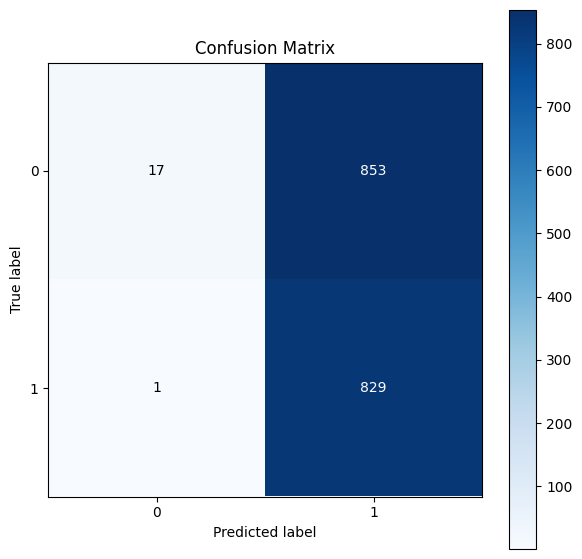

In [32]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, recall_score
import scikitplot as skplt
#plot 
s = svm.SVC(kernel='poly',probability=True) 
s.fit(X_train, y_train)
svm_model = model_predict(X_train, y_train,X_test, y_test, s, 'SVM_Labelled')

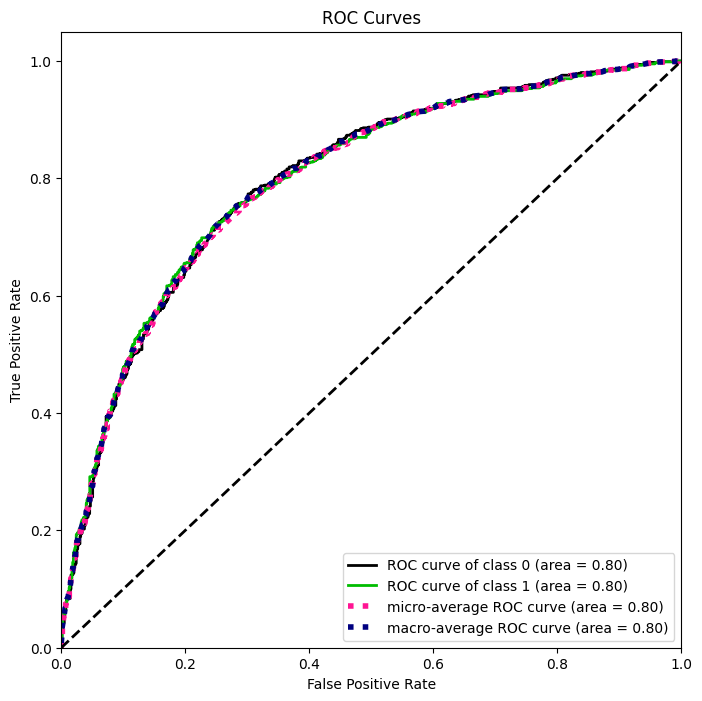

In [33]:
y_probas = s.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 8))   # Plot ROC Curve
plt.show()

##### Applying Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

              precision    recall  f1-score   support

           0       0.83      0.64      0.73       870
           1       0.70      0.86      0.77       830

    accuracy                           0.75      1700
   macro avg       0.76      0.75      0.75      1700
weighted avg       0.77      0.75      0.75      1700



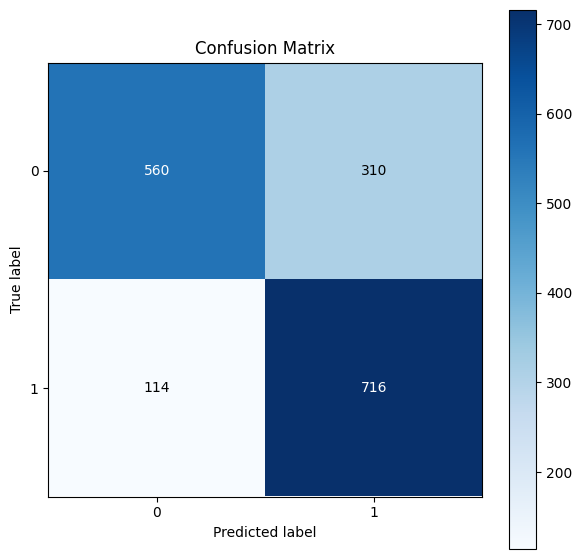

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, recall_score
import scikitplot as skplt

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_model_label = model_predict(X_train, y_train, X_test, y_test, log_reg, 'LR_labelled')

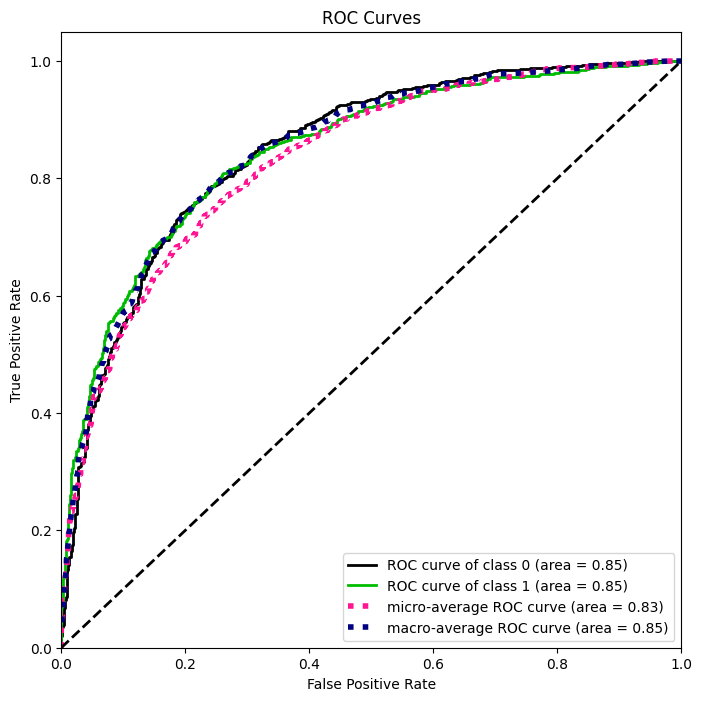

In [35]:
y_probas = log_reg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 8))   # Plot ROC Curve
plt.show()

##### Applying MLP

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       870
           1       0.70      0.80      0.75       830

    accuracy                           0.74      1700
   macro avg       0.74      0.74      0.74      1700
weighted avg       0.74      0.74      0.74      1700



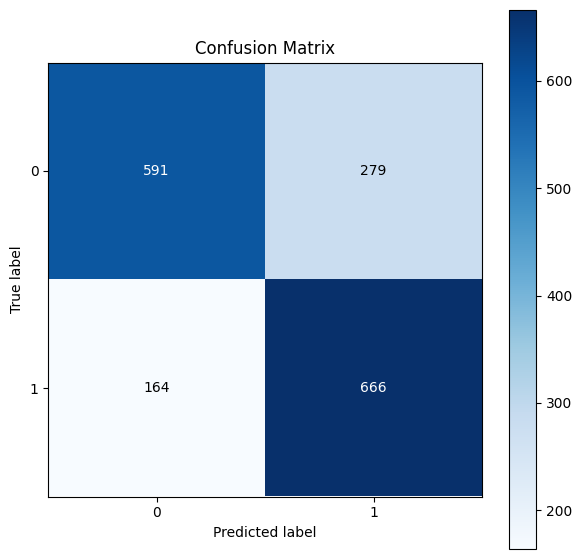

In [36]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
ann.fit(X_train, y_train)
ann_model_label = model_predict(X_train, y_train, X_test, y_test, ann, 'MLP_labelled')


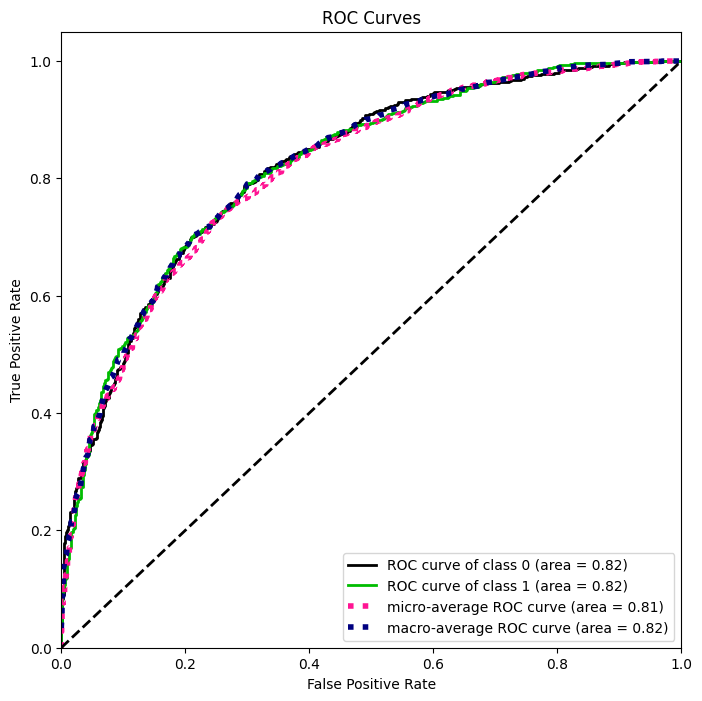

In [37]:
y_probas = ann.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 8))   # Plot ROC Curve
plt.show()

##### Applying Deep learning Model

https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool1D

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Drop rows with missing data
df_test = df_test.dropna(subset=['Cleaned_string'])

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(df_test['Cleaned_string'], df_test['Sentiment'], test_size=0.25, random_state=42)

# Convert text data to TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Define the model
vocab_size = X_train.shape[1]
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=vocab_size))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 5:
        lr *= 0.1
    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=[early_stop, lr_scheduler])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
32/32 [==============================] - 27s 812ms/step - loss: 0.6936 - accuracy: 0.5186 - val_loss: 0.6963 - val_accuracy: 0.4784 - lr: 0.0010
Epoch 2/10
32/32 [==============================] - 26s 823ms/step - loss: 0.6939 - accuracy: 0.5206 - val_loss: 0.6944 - val_accuracy: 0.4784 - lr: 0.0010
Epoch 3/10
32/32 [==============================] - 27s 831ms/step - loss: 0.6944 - accuracy: 0.5206 - val_loss: 0.6964 - val_accuracy: 0.4784 - lr: 0.0010
Epoch 4/10
32/32 [==============================] - 26s 827ms/step - loss: 0.6924 - accuracy: 0.5206 - val_loss: 0.6944 - val_accuracy: 0.4784 - lr: 0.0010
Epoch 5/10
14/14 [==============================] - 3s 184ms/step - loss: 0.6929 - accuracy: 0.5106
Test accuracy: 0.5105882287025452


40/40 [==============================] - 8s 194ms/step
Test accuracy: 0.5105882352941177
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       217
           1       0.00      0.00      0.00       208

    accuracy                           0.51       425
   macro avg       0.26      0.50      0.34       425
weighted avg       0.26      0.51      0.35       425



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

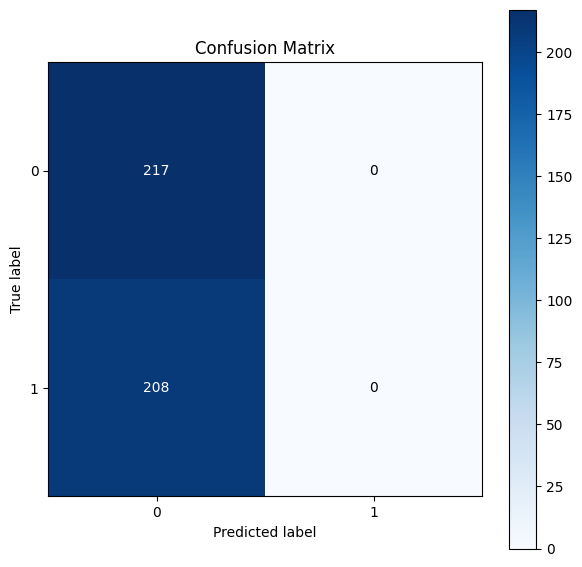

In [39]:
# Evaluate the model
test_predict_prob = model.predict(X_test)
test_predict = test_predict_prob.argmax(axis=-1)
train_predict_prob = model.predict(X_train)
train_predict = train_predict_prob.argmax(axis=-1)
print('Test accuracy:', accuracy_score(y_test, test_predict))
print(classification_report(y_test, test_predict))
skplt.metrics.plot_confusion_matrix(y_test, test_predict, figsize=(7, 7))


In [40]:
import pandas as pd
from sklearn import metrics

def model_eval_deep_learning_model(y_train, y_train_pred, y_test, y_test_pred, model_name):
    # calculate evaluation metrics for training dataset
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)*100
    train_error_rate = 100 - train_accuracy
    train_sensitivity = metrics.recall_score(y_train, y_train_pred)*100
    train_specificity = metrics.recall_score(y_train, y_train_pred, pos_label=0)*100
    train_precision = metrics.precision_score(y_train, y_train_pred)*100
    train_f1_score = metrics.f1_score(y_train, y_train_pred)*100

    # calculate evaluation metrics for testing dataset
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)*100
    test_error_rate = 100 - test_accuracy
    test_sensitivity = metrics.recall_score(y_test, y_test_pred)*100
    test_specificity = metrics.recall_score(y_test, y_test_pred, pos_label=0)*100
    test_precision = metrics.precision_score(y_test, y_test_pred)*100
    test_f1_score = metrics.f1_score(y_test, y_test_pred)*100

    # create a dictionary to store evaluation metrics
    eval_metrics = {'Accuracy': [round(train_accuracy,2), round(test_accuracy)],
                    'ErrorRate': [round(train_error_rate,2), round(test_error_rate,2)],
                    'Sensitivity': [round(train_sensitivity,2), round(test_sensitivity,2)],
                    'Specificity': [round(train_specificity,2), round(test_specificity,2)],
                    'Precision': [round(train_precision,2), round(test_precision,2)],
                    'F1': [round(train_f1_score,2),round(test_f1_score,2)]}

    # create a dataframe to store evaluation metrics
    df_eval_metrics = pd.DataFrame(eval_metrics, index=['{}_train'.format(model_name), '{}_test'.format(model_name)])

    # return the dataframe
    return df_eval_metrics


In [41]:
dl_test=model_eval_deep_learning_model(y_train,train_predict, y_test,test_predict, 'DL_labelled')
dl_test=dl_test.transpose()
dl_test

,DL_labelled_train,DL_labelled_test
Accuracy,51.22,51.00
ErrorRate,48.78,48.94
Sensitivity,0.00,0.00
Specificity,100.00,100.00
Precision,0.00,0.00
F1,0.00,0.00


### Overall Performance on models on Labelled Dataset

In [42]:
pd.concat([log_model_label,ann_model_label,svm_model, dl_test], axis=1)

,LR_labelled_Train,LR_labelled_Test,MLP_labelled_Train,MLP_labelled_Test,SVM_Labelled_Train,SVM_Labelled_Test,DL_labelled_train,DL_labelled_test
Accuracy,93.52,75.06,100.0,73.94,100.0,49.76,51.22,51.00
ErrorRate,6.48,24.94,0.0,26.06,0.0,50.24,48.78,48.94
Sensitivity,96.98,86.27,100.0,80.24,100.0,99.88,0.00,0.00
Specificity,89.32,64.37,100.0,67.93,100.0,1.95,100.00,100.00
Precision,91.70,69.79,100.0,70.48,100.0,49.29,0.00,0.00
F1,94.26,77.16,100.0,75.04,100.0,66.00,0.00,0.00


## Applying ML models on Semi-Supervised Dataset

In [43]:
final = final.dropna(subset=['Cleaned_string'])

SelectedColumns=['Cleaned_string']
Predictors = SelectedColumns
TargetVariable = 'Sentiment'

X=final[Predictors]
y=final[TargetVariable]

# nto numerical feature vectors. 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(final['Cleaned_string'])

#Encoding Labels
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test, = train_test_split(X,
                                               y,
                                               test_size = .25,
                                               random_state=12)




**Classification Models**

### SVM

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1527
           1       1.00      0.68      0.81      1598

    accuracy                           0.84      3125
   macro avg       0.87      0.84      0.83      3125
weighted avg       0.88      0.84      0.83      3125



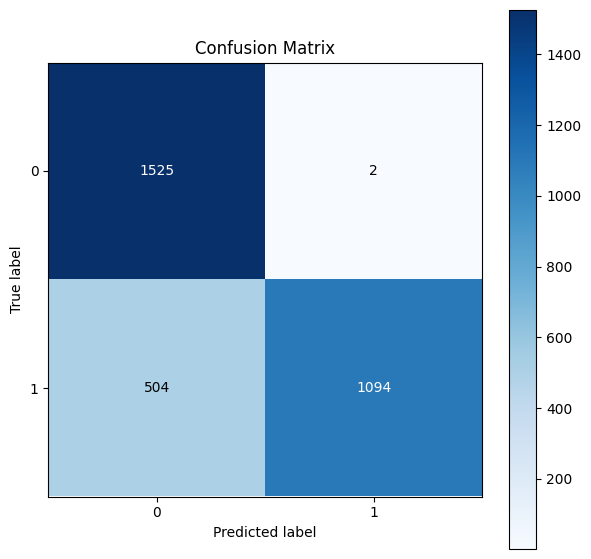

In [44]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, recall_score
import scikitplot as skplt

s = svm.SVC(kernel='poly',probability=True) 
s.fit(X_train, y_train)
svm_model_before= model_predict(X_train, y_train,X_test, y_test, s, 'SVM')

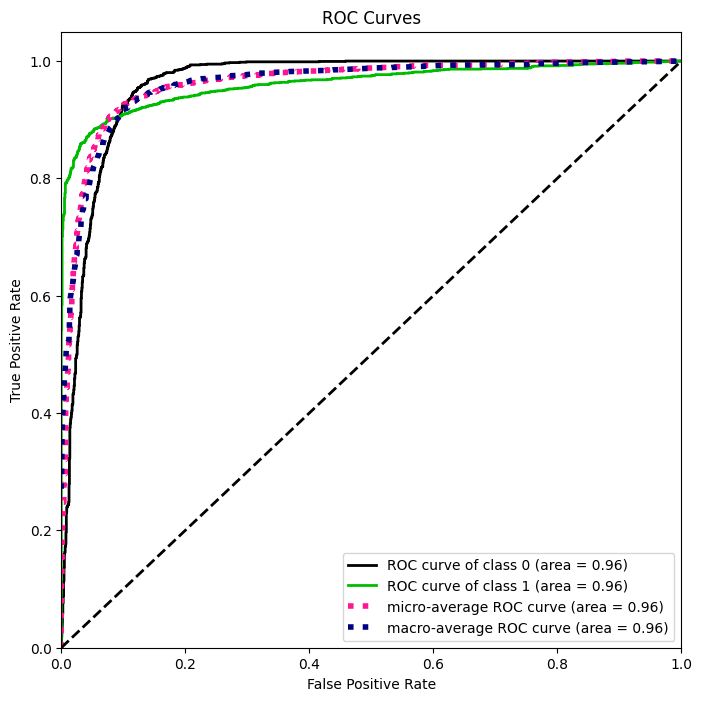

In [45]:
y_probas = s.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 8))   # Plot ROC Curve
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from hyperopt import fmin, hp, tpe, STATUS_OK
# mporting necessary libraries
def objective(params):
    params = {
        'C': params['C'], # Defining objective function to optimize hyperparameters
        'kernel': params['kernel'],
        'degree': int(params['degree']),
        'gamma': params['gamma'],
        'coef0': params['coef0']
    }
    clf = SVC(**params)
    score = cross_val_score(clf, X, y, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()
    return {'loss': -score, 'status': STATUS_OK }
#Defining hyperparameters search space
C = hp.loguniform('C', -5, 5)
kernel = hp.choice('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
degree = hp.quniform('degree', 2, 5, 1)
gamma = hp.choice('gamma', ['scale', 'auto'] + [float(i) for i in range(1, 10)])
coef0 = hp.uniform('coef0', -1, 1)

space = {
    'C': C,
    'kernel': kernel,
    'degree': degree,
    'gamma': gamma,
    'coef0': coef0
}
#Running the hyperparameters optimization using Tree-structured Parzen Estimator algorithm
best = fmin(fn=objective,
space=space,

#Printing the estimated optimum hyperparameters

best = fmin(fn=objective, #eturns a dictionary with the loss and status of the mod
            space=space,
            algo=tpe.suggest,
            max_evals=20)

print("SVM: Hyperopt estimated optimum {}".format(best))


100%|███████████████████████████████████████████████| 20/20 [24:33<00:00, 73.68s/trial, best loss: -0.8632866547824517]
SVM: Hyperopt estimated optimum {'C': 0.07338994030392833, 'coef0': 0.7583145082537384, 'degree': 4.0, 'gamma': 4, 'kernel': 2}


https://scikit-learn.org/stable/modules/svm.html

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1527
           1       0.99      0.82      0.89      1598

    accuracy                           0.90      3125
   macro avg       0.91      0.90      0.90      3125
weighted avg       0.91      0.90      0.90      3125



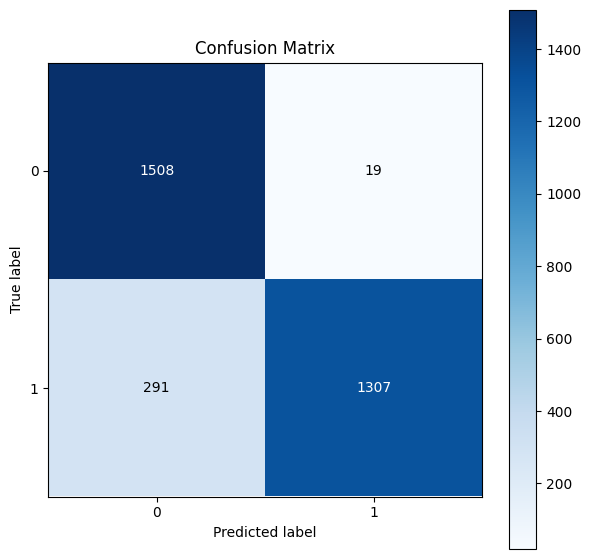

In [47]:
# create SVM classifier with optimized hyperparameters
ker=['linear', 'rbf', 'poly', 'sigmoid']
k=ker[best['kernel']]
s = svm.SVC(
    C=best['C'],
    kernel=k,
    degree=int(best['degree']),
    gamma=best['gamma'],
    coef0=best['coef0'],
    probability=True
)

# fit the model
s.fit(X_train, y_train)

# make predictions and evaluate the model
svm_model_after = model_predict(X_train, y_train, X_test, y_test, s, 'SVM_botpe')


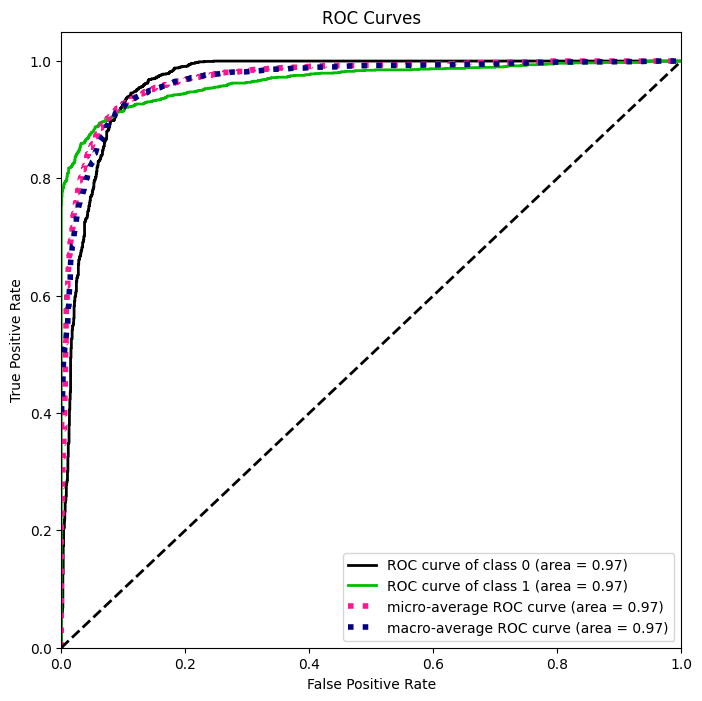

In [48]:
y_probas = s.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 8))   # Plot ROC Curve
plt.show()

### Comparing Before and after hyperparameter Tuning

In [49]:
pd.concat([svm_model_before,svm_model_after], axis=1)

,SVM_Train,SVM_Test,SVM_botpe_Train,SVM_botpe_Test
Accuracy,100.0,83.81,100.0,90.08
ErrorRate,0.0,16.19,0.0,9.92
Sensitivity,100.0,68.46,100.0,81.79
Specificity,100.0,99.87,100.0,98.76
Precision,100.0,99.82,100.0,98.57
F1,100.0,81.22,100.0,89.40


**MLP**

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1527
           1       0.94      0.91      0.92      1598

    accuracy                           0.92      3125
   macro avg       0.92      0.92      0.92      3125
weighted avg       0.92      0.92      0.92      3125



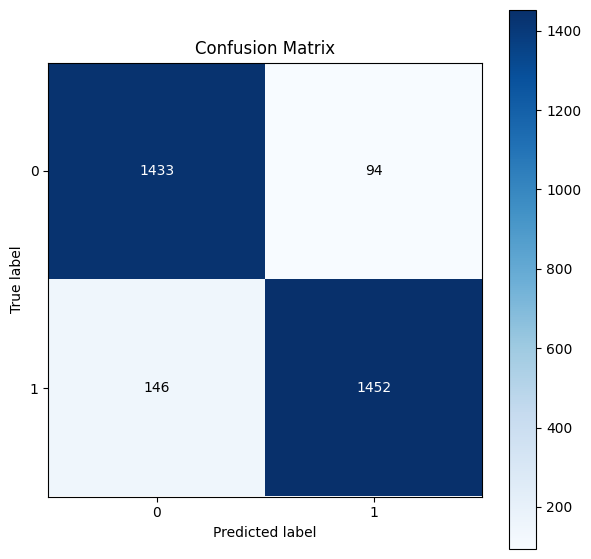

In [50]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
ann.fit(X_train, y_train)
ann_model_before = model_predict(X_train, y_train, X_test, y_test, ann, 'MLP')



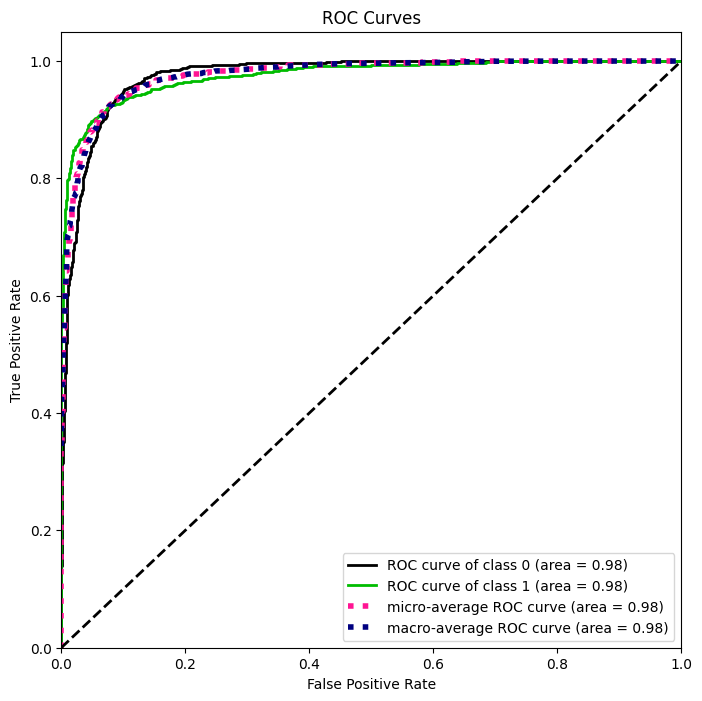

In [51]:
y_probas = ann.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 8))   # Plot ROC Curve
plt.show()

**Hyperparameter Tuning of MLP**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [52]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from hyperopt import fmin, hp, tpe, STATUS_OK #Importing necessary libraries

# Applying hyperparameter tuning
def objective(params):
    params = { #Defining objective function to optimize hyperparameters
        'hidden_layer_sizes': params['hidden_layer_sizes'], 
        "alpha":float(params['alpha']),
        'solver':str(params['solver']),
        'learning_rate':str(params['learning_rate']),
        'activation':str(params['activation'])
        # Defining hyperparameters search space
    }
    clf = MLPClassifier(**params)
    score = cross_val_score(clf, X, y, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()
    return {'loss':-score, 'status': STATUS_OK }
Activation=['tanh', 'relu','logistic']
Solver= ['sgd', 'adam','lbfgs']
Alpha=[0.001,0.5,0.01,0.1]
LR=['constant','adaptive']
Hidden_layer_sizes=[(10,30,10),(20,)]
space = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes',Hidden_layer_sizes),
    'activation':hp.choice('activation',Activation),
    'solver' : hp.choice('solver',Solver),
    'alpha' : hp.choice('alpha',Alpha),
    'learning_rate':hp.choice('learning_rate',LR)
    
    }
#Running the hyperparameters optimization using Tree-structured Parzen Estimator algorithm
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
#Printing the estimated optimum hyperparameters
print("MLP: Hyperopt estimated optimum {}".format(best))

100%|████████████████████████████████████████████| 20/20 [2:13:46<00:00, 401.31s/trial, best loss: -0.8656843122257373]
MLP: Hyperopt estimated optimum {'activation': 0, 'alpha': 0, 'hidden_layer_sizes': 1, 'learning_rate': 1, 'solver': 1}


              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1527
           1       0.94      0.91      0.92      1598

    accuracy                           0.92      3125
   macro avg       0.92      0.92      0.92      3125
weighted avg       0.92      0.92      0.92      3125



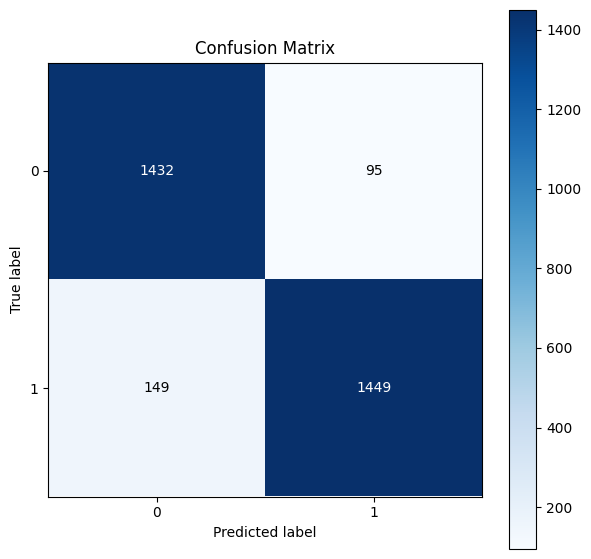

In [53]:
ann1 = MLPClassifier(activation=Activation[best['activation']],alpha=int(Alpha[best['alpha']]),hidden_layer_sizes=Hidden_layer_sizes[best['hidden_layer_sizes']],learning_rate=LR[best['learning_rate']],solver=Solver[best['solver']])
ann1.fit(X_train, y_train)
ann_model_after = model_predict(X_train, y_train,X_test, y_test, ann1, 'hyperparameter_tuned_MLP')


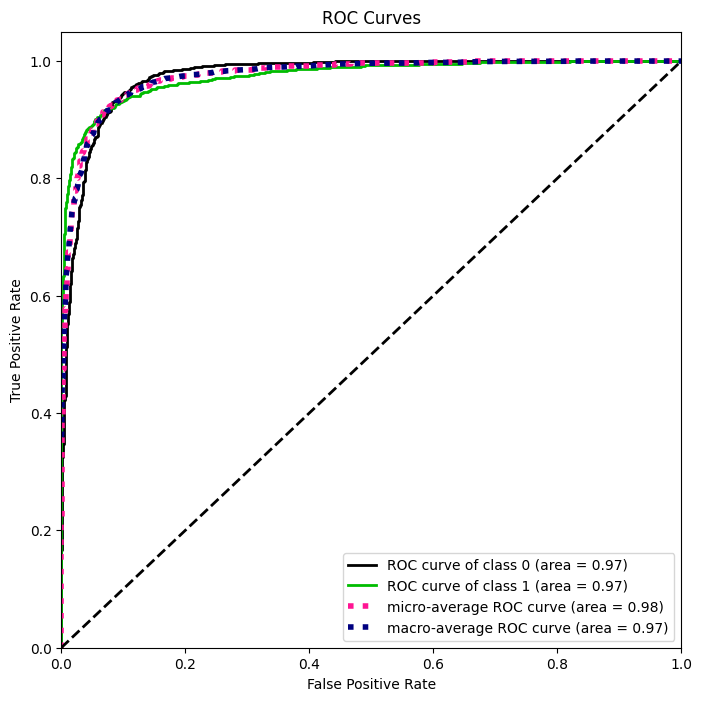

In [54]:
y_probas = ann1.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 8))   # Plot ROC Curve
plt.show()

In [55]:
pd.concat([ann_model_before,ann_model_after], axis=1)

,MLP_Train,MLP_Test,hyperparameter_tuned_MLP_Train,hyperparameter_tuned_MLP_Test
Accuracy,100.0,92.32,100.0,92.19
ErrorRate,0.0,7.68,0.0,7.81
Sensitivity,100.0,90.86,100.0,90.68
Specificity,100.0,93.84,100.0,93.78
Precision,100.0,93.92,100.0,93.85
F1,100.0,92.37,100.0,92.23


**Logistic Regression**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1527
           1       0.97      0.88      0.92      1598

    accuracy                           0.93      3125
   macro avg       0.93      0.93      0.93      3125
weighted avg       0.93      0.93      0.93      3125



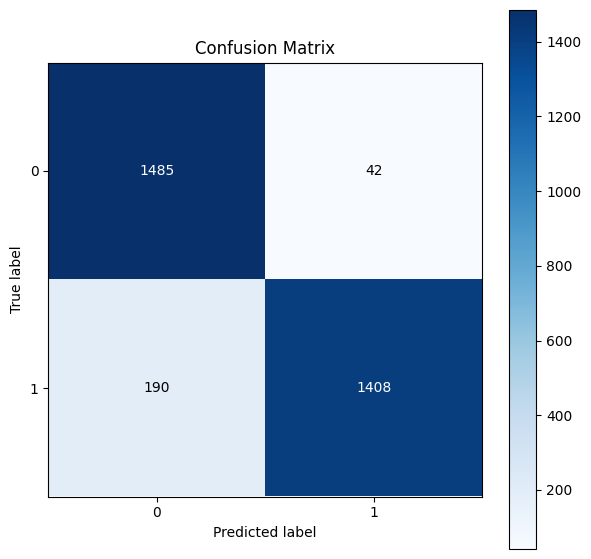

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, recall_score
import scikitplot as skplt
# applying log 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_model_before = model_predict(X_train, y_train, X_test, y_test, log_reg, 'LR')

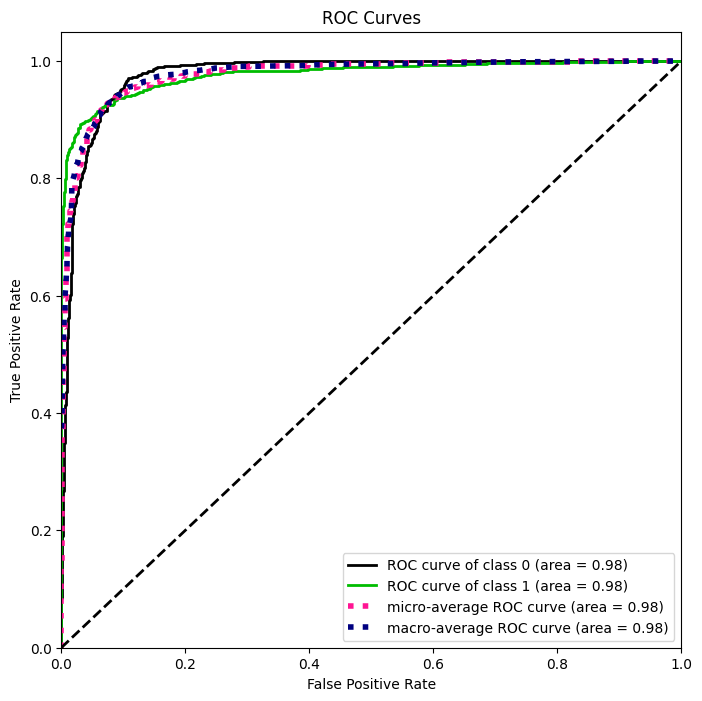

In [57]:
y_probas = log_reg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 8))   # Plot ROC Curve
plt.show()

## Hyperparameter Tuning

https://docs.databricks.com/_extras/notebooks/source/hyperopt-sklearn-model-selection.html

In [58]:
from hyperopt import fmin, tpe, hp, STATUS_OK
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
#Importing necessary libraries.

def objective(params): # objective function to optimize. 
    params = {
        'penalty': params['penalty'], 
        'C': params['C'],
        'solver': params['solver'],
        'max_iter': int(params['max_iter'])
    }
    clf = LogisticRegression(**params)
    score = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()
    return {'loss': -score, 'status': STATUS_OK }

space = {
    'penalty': hp.choice('penalty', [ 'l2']),
    'C': hp.quniform('C', 0.001, 100, 1), # range from 0.001 to 100 with a step size of 1.
    'solver': hp.choice('solver', [ 'sag', 'saga']),
    'max_iter': hp.quniform('max_iter', 100, 5000, 500)
}
#Defining the search space for the hyperparameters.
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20)
# with fmin function from hyperopt
print("Logistic Regression: Hyperopt estimated optimum {}".format(best))


100%|███████████████████████████████████████████████| 20/20 [00:11<00:00,  1.68trial/s, best loss: -0.9084797763851015]
Logistic Regression: Hyperopt estimated optimum {'C': 41.0, 'max_iter': 1500.0, 'penalty': 0, 'solver': 1}


              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1527
           1       0.96      0.91      0.93      1598

    accuracy                           0.93      3125
   macro avg       0.93      0.93      0.93      3125
weighted avg       0.94      0.93      0.93      3125



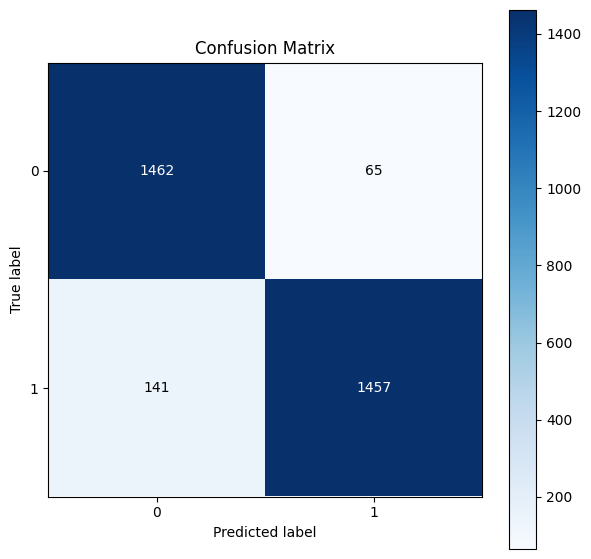

In [59]:
Solver=['sag','saga'] # # Defining the list of solvers to search over
## Defining the list of penalties to search over
Penalty=['l2'] ## Getting the index of the penalty and solver from the best hyperparameters obtained from hyperopt
penalty_index=best['penalty']
solver_index=best['solver']
# Creating a Logistic Regression model with the best hyperparameters obtained
log = LogisticRegression(C=best['C'],max_iter=int(best['max_iter']),penalty=Penalty[penalty_index],solver=Solver[solver_index])
log.fit(X_train, y_train) # Fitting the Logistic Regression model on the training data
# Generating model performance metrics on the test data using the trained Logistic Regression model
log_model_after = model_predict(X_train, y_train,X_test, y_test, log, 'LR_Botye')

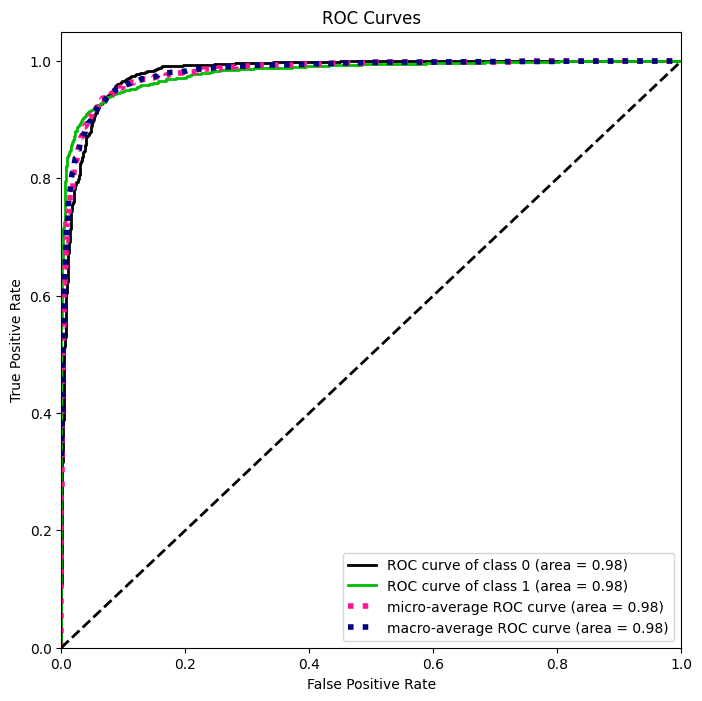

In [60]:
y_probas = log.predict_proba(X_test) # predicting the probabilities of the classes
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 8))   # Plot ROC Curve
plt.show()

In [61]:
pd.concat([log_model_before,log_model_after], axis=1)

,LR_Train,LR_Test,LR_Botye_Train,LR_Botye_Test
Accuracy,96.76,92.58,100.0,93.41
ErrorRate,3.24,7.42,0.0,6.59
Sensitivity,94.37,88.11,100.0,91.18
Specificity,99.11,97.25,100.0,95.74
Precision,99.05,97.10,100.0,95.73
F1,96.65,92.39,100.0,93.40


#### Deep Learning Model

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Drop rows with missing data
df_test = df_test.dropna(subset=['Cleaned_string'])

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(df_test['Cleaned_string'], df_test['Sentiment'], test_size=0.25, random_state=42)

# Convert text data to TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Define the model
vocab_size = X_train.shape[1]
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=vocab_size))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 5:
        lr *= 0.1
    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=[early_stop, lr_scheduler])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
32/32 [==============================] - 30s 913ms/step - loss: 0.6953 - accuracy: 0.5206 - val_loss: 0.6937 - val_accuracy: 0.4784 - lr: 0.0010
Epoch 2/10
32/32 [==============================] - 29s 906ms/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6942 - val_accuracy: 0.4784 - lr: 0.0010
Epoch 3/10
32/32 [==============================] - 29s 912ms/step - loss: 0.6926 - accuracy: 0.5206 - val_loss: 0.6950 - val_accuracy: 0.4784 - lr: 0.0010
Epoch 4/10
14/14 [==============================] - 3s 184ms/step - loss: 0.6929 - accuracy: 0.5106
Test accuracy: 0.5105882287025452


40/40 [==============================] - 8s 203ms/step
Test accuracy: 0.5105882352941177
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       217
           1       0.00      0.00      0.00       208

    accuracy                           0.51       425
   macro avg       0.26      0.50      0.34       425
weighted avg       0.26      0.51      0.35       425



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

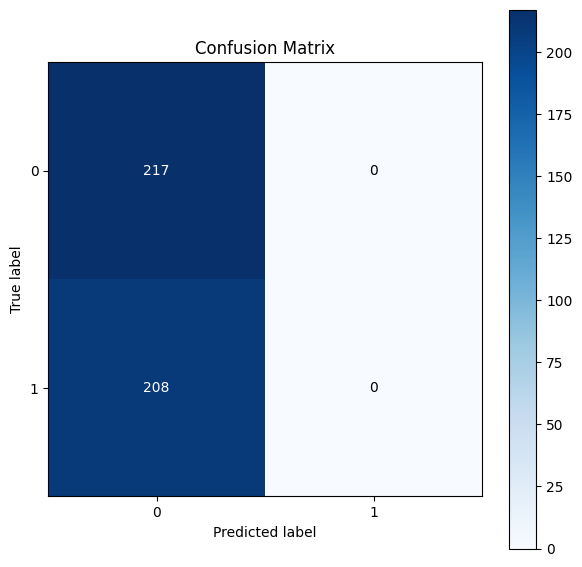

In [63]:
# Evaluate the model
test_predict_prob = model.predict(X_test)
test_predict = test_predict_prob.argmax(axis=-1)
train_predict_prob = model.predict(X_train)
train_predict = train_predict_prob.argmax(axis=-1)
print('Test accuracy:', accuracy_score(y_test, test_predict))
print(classification_report(y_test, test_predict))
skplt.metrics.plot_confusion_matrix(y_test, test_predict, figsize=(7, 7))

In [64]:
semi_dl_test=model_eval_deep_learning_model(y_train,train_predict, y_test,test_predict, 'DL')
semi_dl_test=semi_dl_test.transpose()
semi_dl_test

,DL_train,DL_test
Accuracy,51.22,51.00
ErrorRate,48.78,48.94
Sensitivity,0.00,0.00
Specificity,100.00,100.00
Precision,0.00,0.00
F1,0.00,0.00


**Comparison of Different Models before and after applying Botye**

In [65]:
pd.concat([log_model_before,log_model_after,ann_model_before,ann_model_after,svm_model_before,svm_model_after, semi_dl_test], axis=1)

,LR_Train,LR_Test,LR_Botye_Train,LR_Botye_Test,MLP_Train,MLP_Test,hyperparameter_tuned_MLP_Train,hyperparameter_tuned_MLP_Test,SVM_Train,SVM_Test,SVM_botpe_Train,SVM_botpe_Test,DL_train,DL_test
Accuracy,96.76,92.58,100.0,93.41,100.0,92.32,100.0,92.19,100.0,83.81,100.0,90.08,51.22,51.00
ErrorRate,3.24,7.42,0.0,6.59,0.0,7.68,0.0,7.81,0.0,16.19,0.0,9.92,48.78,48.94
Sensitivity,94.37,88.11,100.0,91.18,100.0,90.86,100.0,90.68,100.0,68.46,100.0,81.79,0.00,0.00
Specificity,99.11,97.25,100.0,95.74,100.0,93.84,100.0,93.78,100.0,99.87,100.0,98.76,100.00,100.00
Precision,99.05,97.10,100.0,95.73,100.0,93.92,100.0,93.85,100.0,99.82,100.0,98.57,0.00,0.00
F1,96.65,92.39,100.0,93.40,100.0,92.37,100.0,92.23,100.0,81.22,100.0,89.40,0.00,0.00


**Comparison of Models --> Labelled Dataset Vs Semi-Supervised Dataset**

In [66]:
pd.concat([log_model_after,ann_model_after,semi_dl_test,log_model_label,ann_model_label,dl_test,svm_model_after,svm_model], axis=1)

,LR_Botye_Train,LR_Botye_Test,hyperparameter_tuned_MLP_Train,hyperparameter_tuned_MLP_Test,DL_train,DL_test,LR_labelled_Train,LR_labelled_Test,MLP_labelled_Train,MLP_labelled_Test,DL_labelled_train,DL_labelled_test,SVM_botpe_Train,SVM_botpe_Test,SVM_Labelled_Train,SVM_Labelled_Test
Accuracy,100.0,93.41,100.0,92.19,51.22,51.00,93.52,75.06,100.0,73.94,51.22,51.00,100.0,90.08,100.0,49.76
ErrorRate,0.0,6.59,0.0,7.81,48.78,48.94,6.48,24.94,0.0,26.06,48.78,48.94,0.0,9.92,0.0,50.24
Sensitivity,100.0,91.18,100.0,90.68,0.00,0.00,96.98,86.27,100.0,80.24,0.00,0.00,100.0,81.79,100.0,99.88
Specificity,100.0,95.74,100.0,93.78,100.00,100.00,89.32,64.37,100.0,67.93,100.00,100.00,100.0,98.76,100.0,1.95
Precision,100.0,95.73,100.0,93.85,0.00,0.00,91.70,69.79,100.0,70.48,0.00,0.00,100.0,98.57,100.0,49.29
F1,100.0,93.40,100.0,92.23,0.00,0.00,94.26,77.16,100.0,75.04,0.00,0.00,100.0,89.40,100.0,66.00
